In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import tensorflow as tf

In [2]:
df=pd.read_csv("//Users/pritipuniya/Downloads/traffic/Plane _Price.csv")

In [3]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [4]:
df.shape

(517, 16)

In [5]:
df.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [7]:
df.isnull().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.isnull().sum()

Model Name                 0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            0
Rcmnd cruise Knots         0
Stall Knots dirty          0
Fuel gal/lbs               0
All eng rate of climb      0
Eng out rate of climb      0
Takeoff over 50ft          0
Landing over 50ft          0
Empty weight lbs           0
Length ft/in               0
Wing span ft/in            0
Range N.M.                 0
Price                      0
dtype: int64

In [10]:
#finding correlation

In [11]:
correlation =df.corr()

/var/folders/qh/1f5hnn812rgcd6h3q3jvmb9c0000gn/T/ipykernel_74003/421731128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


<Axes: >

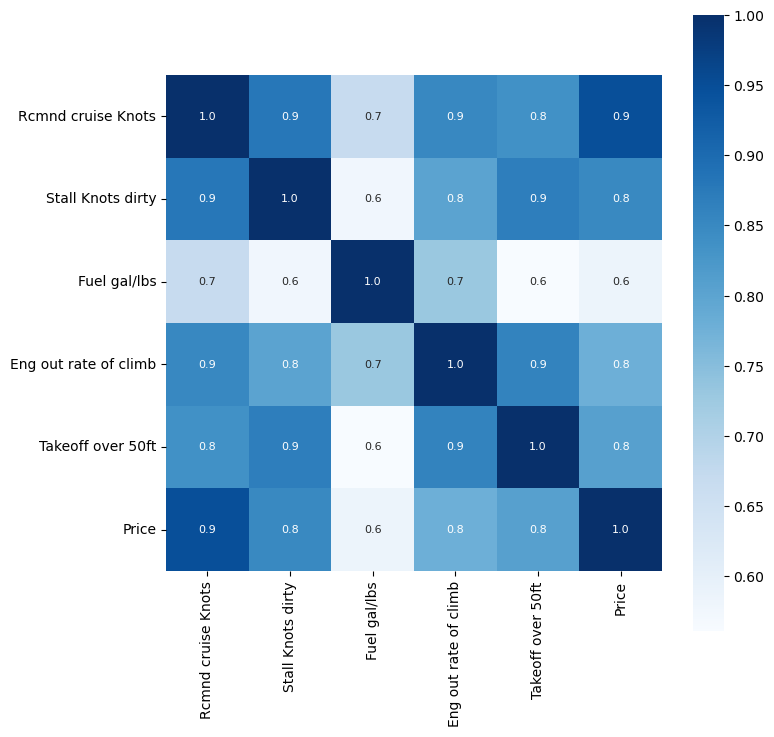

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               421 non-null    object 
 1   Engine Type              421 non-null    object 
 2   HP or lbs thr ea engine  421 non-null    object 
 3   Max speed Knots          421 non-null    object 
 4   Rcmnd cruise Knots       421 non-null    float64
 5   Stall Knots dirty        421 non-null    float64
 6   Fuel gal/lbs             421 non-null    int64  
 7   All eng rate of climb    421 non-null    object 
 8   Eng out rate of climb    421 non-null    float64
 9   Takeoff over 50ft        421 non-null    float64
 10  Landing over 50ft        421 non-null    object 
 11  Empty weight lbs         421 non-null    object 
 12  Length ft/in             421 non-null    object 
 13  Wing span ft/in          421 non-null    object 
 14  Range N.M.               4

In [14]:
df.drop(['Model Name'],axis=1,inplace=True)

In [15]:
df.head()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [16]:
#cleaning the data

In [18]:
df['HP or lbs thr ea engine'] =df['HP or lbs thr ea engine'].str.replace(',','')
df['HP or lbs thr ea engine']  = df['HP or lbs thr ea engine'].str.extract('(\d+)')
df['HP or lbs thr ea engine']  = df['HP or lbs thr ea engine'].astype('float32')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              421 non-null    object 
 1   HP or lbs thr ea engine  421 non-null    float32
 2   Max speed Knots          421 non-null    object 
 3   Rcmnd cruise Knots       421 non-null    float64
 4   Stall Knots dirty        421 non-null    float64
 5   Fuel gal/lbs             421 non-null    int64  
 6   All eng rate of climb    421 non-null    object 
 7   Eng out rate of climb    421 non-null    float64
 8   Takeoff over 50ft        421 non-null    float64
 9   Landing over 50ft        421 non-null    object 
 10  Empty weight lbs         421 non-null    object 
 11  Length ft/in             421 non-null    object 
 12  Wing span ft/in          421 non-null    object 
 13  Range N.M.               421 non-null    object 
 14  Price                    4

In [20]:
df['Max speed Knots'] =df['Max speed Knots'].str.replace(',','')
df['Max speed Knots']  = df['Max speed Knots'].str.extract('(\d+)')
df['Max speed Knots']  = df['Max speed Knots'].astype('float32')

In [21]:
df['All eng rate of climb'] =df['All eng rate of climb'].str.replace(',','')
df['All eng rate of climb']  = df['All eng rate of climb'].str.extract('(\d+)')
df['All eng rate of climb']  = df['All eng rate of climb'].astype('float32')

In [22]:
df['Landing over 50ft'] =df['Landing over 50ft'].str.replace(',','')
df['Landing over 50ft']  = df['Landing over 50ft'].str.extract('(\d+)')
df['Landing over 50ft']  = df['Landing over 50ft'].astype('float32')

In [23]:
df['Empty weight lbs'] =df['Empty weight lbs'].str.replace(',','')
df['Empty weight lbs']  = df['Empty weight lbs'].str.extract('(\d+)')
df['Empty weight lbs']  = df['Empty weight lbs'].astype('float32')

In [24]:
df['Wing span ft/in'] =df['Wing span ft/in'].str.replace(',','')
df['Wing span ft/in']  = df['Wing span ft/in'].str.extract('(\d+)')
df['Wing span ft/in']  = df['Wing span ft/in'].astype('float32')

In [25]:
df['Range N.M.'] =df['Range N.M.'].str.replace(',','')

In [27]:
df['Range N.M.']  = df['Range N.M.'].str.extract('(\d+)')
df['Range N.M.']  = df['Range N.M.'].astype('float32')

In [29]:
df['Length ft/in'] =df['Length ft/in'].str.replace(',','')
df['Length ft/in']  = df['Length ft/in'].str.extract('(\d+)')
df['Length ft/in']  = df['Length ft/in'].astype('float32')

In [31]:
df['Fuel gal/lbs'] = df['Fuel gal/lbs'].astype('int')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              421 non-null    object 
 1   HP or lbs thr ea engine  421 non-null    float32
 2   Max speed Knots          421 non-null    float32
 3   Rcmnd cruise Knots       421 non-null    float64
 4   Stall Knots dirty        421 non-null    float64
 5   Fuel gal/lbs             421 non-null    int64  
 6   All eng rate of climb    421 non-null    float32
 7   Eng out rate of climb    421 non-null    float64
 8   Takeoff over 50ft        421 non-null    float64
 9   Landing over 50ft        421 non-null    float32
 10  Empty weight lbs         421 non-null    float32
 11  Length ft/in             421 non-null    float32
 12  Wing span ft/in          421 non-null    float32
 13  Range N.M.               421 non-null    float32
 14  Price                    4

In [39]:
df.drop(['Engine Type'],axis=1,inplace=True)

In [40]:
#separting labels in dataset

In [41]:
X=df.drop('Price', axis=1)
Y=df['Price']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 


In [43]:
 X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((252, 13), (169, 13), (252,), (169,))

In [47]:
#log regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix=confusion_matrix(Y_test,y_pred)

In [49]:
print(accuracy)

0.09467455621301775


In [50]:
print(conf_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
#using tensorflow neural networks

In [53]:
model = tf.keras.Sequential()

In [57]:
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

In [58]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [60]:
hist = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),batch_size=32,epochs=500, verbose=2)


Epoch 1/500
8/8 - 0s - loss: 6516010123264.0000 - accuracy: 0.0000e+00 - val_loss: 5475823779840.0000 - val_accuracy: 0.0000e+00 - 394ms/epoch - 49ms/step
Epoch 2/500
8/8 - 0s - loss: 6502020022272.0000 - accuracy: 0.0000e+00 - val_loss: 5458801721344.0000 - val_accuracy: 0.0000e+00 - 21ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 6485388034048.0000 - accuracy: 0.0000e+00 - val_loss: 5437630971904.0000 - val_accuracy: 0.0000e+00 - 22ms/epoch - 3ms/step
Epoch 4/500
8/8 - 0s - loss: 6464538148864.0000 - accuracy: 0.0000e+00 - val_loss: 5409012711424.0000 - val_accuracy: 0.0000e+00 - 24ms/epoch - 3ms/step
Epoch 5/500
8/8 - 0s - loss: 6435248799744.0000 - accuracy: 0.0000e+00 - val_loss: 5368911495168.0000 - val_accuracy: 0.0000e+00 - 22ms/epoch - 3ms/step
Epoch 6/500
8/8 - 0s - loss: 6394161922048.0000 - accuracy: 0.0000e+00 - val_loss: 5314309521408.0000 - val_accuracy: 0.0000e+00 - 22ms/epoch - 3ms/step
Epoch 7/500
8/8 - 0s - loss: 6339819470848.0000 - accuracy: 0.0000e+00 - val_los

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 input_3 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


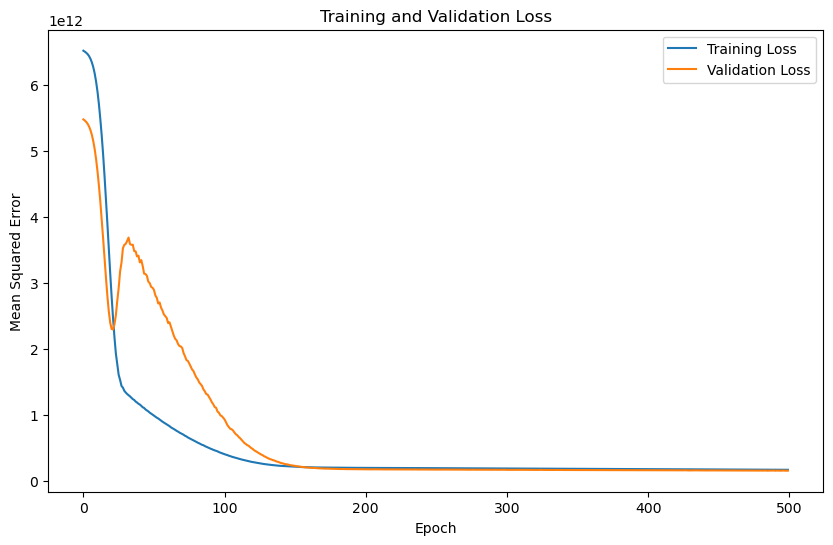

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


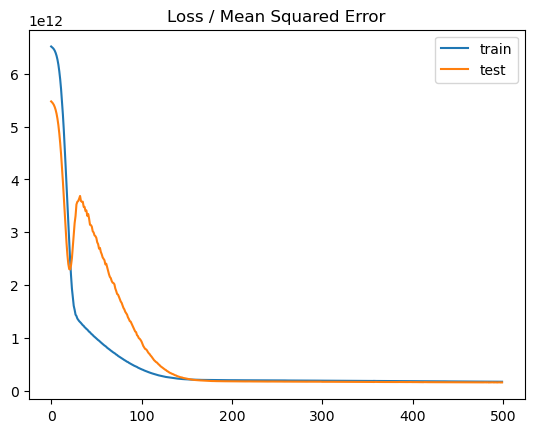

In [65]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()